In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf


In [ ]:
import matplotlib.pyplot as plt


*QUESTÃO 1* 

*a)* Temos que os kernels se mostram como pesos de uma MLP, e também atribiu pesos zeros para regiões onde o kernel não está sendo aplicado, com isso chamamos de esparças.

*b)* Utilizar o mesmo kernel em diferentes partes da mesma será a diminuição do número de paramêtros.

*c)* No modelo de redes neurais convolucionais, temos que o compartilhamento de pesos, permite com que os pesos de um determinado kernel seja usado vários pixels.


*QUESTÃO 2*

aplicando com stride(2,2)

$\begin{bmatrix} 1 & 2 & 3  & 4& 5\\ 1 & 1 & 1 & 1 & 1 \\ 0 & 1 & -2 & 1 & -1\\ 0 & 0 & 0 & -2 & 1\\1 &2&2& 0&0 \end{bmatrix}$ * $\begin{bmatrix} 1 & 0 & 0 \\ 1 & 0&0 \\1&0&0\end{bmatrix}$ = $\begin{bmatrix} 2&2 \\ 1&0 \end{bmatrix}$

* QUESTÃO 3*

In [ ]:
CIFAR10 = tf.keras.datasets.cifar10.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170508288/170498071 [==============================] - 4s 0us/step


*A)*

In [ ]:
print( "x_train.shape")
print( x_train.shape )


print( "x_test.shape")
print( x_test.shape )

print( "y_train.shape")
print( y_train.shape )

print( "y_test.shape")
print( y_test.shape )


x_train.shape
(50000, 32, 32, 3)
x_test.shape
(10000, 32, 32, 3)
y_train.shape
(50000, 1)
y_test.shape
(10000, 1)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'shipe', 'truck']

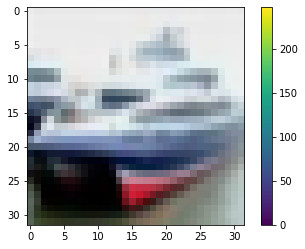

In [ ]:
plt.figure()
plt.imshow(x_test[1])
plt.colorbar()

plt.show()

*B)*

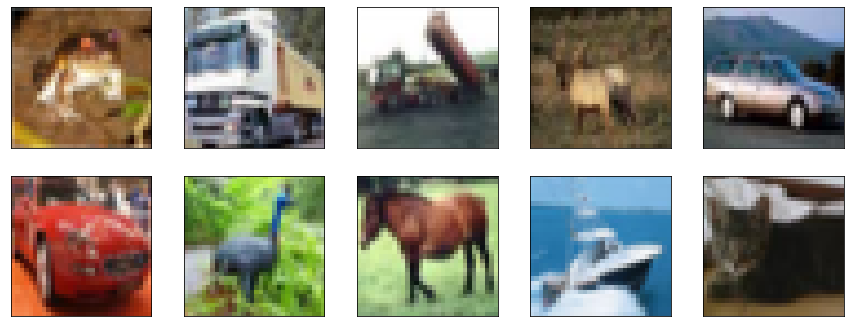

In [ ]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    
plt.show()

*C)*

In [ ]:
x_train= x_train / 255.0

x_test = x_test / 255.0

*D)*

CNN com 3 camadas, sendo todas as funçoes de ativaçao `Relu` e usando sempre maxpooling.

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

Usando o modelo com 7 epocas e 1000 steps por epocas.

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history1 = model1.fit(x_train, y_train, epochs=7, steps_per_epoch= 1000, validation_split = 1/5)
model1.evaluate(x_test,  y_test, verbose=2)

Epoch 1/7
1000/1000 [==============================] - 73s 72ms/step - loss: 1.6234 - accuracy: 0.3956 - val_loss: 1.2870 - val_accuracy: 0.5364
Epoch 2/7
1000/1000 [==============================] - 72s 72ms/step - loss: 1.2135 - accuracy: 0.5620 - val_loss: 1.1949 - val_accuracy: 0.5798
Epoch 3/7
1000/1000 [==============================] - 72s 72ms/step - loss: 1.0385 - accuracy: 0.6319 - val_loss: 1.0767 - val_accuracy: 0.6160
Epoch 4/7
1000/1000 [==============================] - 72s 72ms/step - loss: 0.9180 - accuracy: 0.6765 - val_loss: 0.9735 - val_accuracy: 0.6629
Epoch 5/7
1000/1000 [==============================] - 72s 72ms/step - loss: 0.8252 - accuracy: 0.7108 - val_loss: 0.9041 - val_accuracy: 0.6845
Epoch 6/7
1000/1000 [==============================] - 72s 72ms/step - loss: 0.7470 - accuracy: 0.7379 - val_loss: 0.8496 - val_accuracy: 0.7043
Epoch 7/7
1000/1000 [==============================] - 73s 73ms/step - loss: 0.6801 - accuracy: 0.7596 - val_loss: 0.8907 - val_ac

[0.9231033325195312, 0.6944000124931335]

*CNN* com 4 camadas, sendo todas as funçoes de ativaçao Relu e usando sempre maxpooling

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

usando a função `Adam`

In [ ]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history3 = model3.fit(x_train, y_train, epochs=5, steps_per_epoch= 1000, validation_split = 1/5)
model3.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1000/1000 [==============================] - 69s 68ms/step - loss: 1.7049 - accuracy: 0.3491 - val_loss: 1.4297 - val_accuracy: 0.4788
Epoch 2/5
1000/1000 [==============================] - 67s 67ms/step - loss: 1.2539 - accuracy: 0.5424 - val_loss: 1.2536 - val_accuracy: 0.5415
Epoch 3/5
1000/1000 [==============================] - 68s 68ms/step - loss: 1.0897 - accuracy: 0.6072 - val_loss: 1.1076 - val_accuracy: 0.6134
Epoch 4/5
1000/1000 [==============================] - 67s 67ms/step - loss: 0.9727 - accuracy: 0.6517 - val_loss: 0.9665 - val_accuracy: 0.6583
Epoch 5/5
1000/1000 [==============================] - 68s 68ms/step - loss: 0.8921 - accuracy: 0.6851 - val_loss: 0.9434 - val_accuracy: 0.6711
313/313 - 4s - loss: 0.9758 - accuracy: 0.6603


[0.9757845997810364, 0.6603000164031982]

CNN com 2 camadas, sendo todas as funçoes de ativaçao Relu e usando sempre maxpooling

In [ ]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

Usando a função `Adam` com learninang rate igual 0.001, e usando 5 epocas.

In [ ]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history4 = model4.fit(x_train, y_train, epochs=5, steps_per_epoch= 1000, validation_split = 1/5)
model4.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1000/1000 [==============================] - 54s 54ms/step - loss: 0.0615 - accuracy: 0.9798 - val_loss: 2.0875 - val_accuracy: 0.6762
Epoch 2/5
1000/1000 [==============================] - 55s 55ms/step - loss: 0.0509 - accuracy: 0.9837 - val_loss: 2.1454 - val_accuracy: 0.6748
Epoch 3/5
1000/1000 [==============================] - 54s 54ms/step - loss: 0.0454 - accuracy: 0.9846 - val_loss: 2.4105 - val_accuracy: 0.6667
Epoch 4/5
1000/1000 [==============================] - 55s 55ms/step - loss: 0.0518 - accuracy: 0.9835 - val_loss: 2.2537 - val_accuracy: 0.6619
Epoch 5/5
1000/1000 [==============================] - 54s 54ms/step - loss: 0.0470 - accuracy: 0.9849 - val_loss: 2.1962 - val_accuracy: 0.6700
313/313 - 3s - loss: 2.2285 - accuracy: 0.6593


[2.228501081466675, 0.6593000292778015]

In [ ]:
model4.evaluate(x_test,  y_test)

313/313 [==============================] - 4s 11ms/step - loss: 2.2285 - accuracy: 0.6593


[2.228501081466675, 0.6593000292778015]

*E)* 

temos que com duas camadas:
com o conjunto validação dando 67%.

In [ ]:
model4.evaluate(x_test,  y_test),


1563/1563 [==============================] - 18s 11ms/step - loss: 0.4745 - accuracy: 0.9230


[0.4744809865951538, 0.923039972782135]

Para 4 camadas:
com o conjunto validação dando 67%

In [ ]:
model3.evaluate(x_train,  y_train, verbose=2)
model3.evaluate(x_test,  y_test),

1563/1563 - 21s - loss: 0.8349 - accuracy: 0.7075
313/313 [==============================] - 5s 15ms/step - loss: 0.9758 - accuracy: 0.6603


([0.9757845997810364, 0.6603000164031982],)

Para 3 camadas:

com o conjunto validação dando 69%

In [ ]:
model1.evaluate(x_test,  y_test, verbose=2)

313/313 - 4s - loss: 0.9231 - accuracy: 0.6944


[0.9231033325195312, 0.6944000124931335]

Com isso podemos ver que o com 3 camadas e usando 7 epocas, o treinamento performou melhor.

*F)*

In [ ]:
model5 = tf.keras.models.Sequential([
  
  tf.keras.layers.ZeroPadding2D( (2,2) ),
  tf.keras.layers.Conv2D( 4, (3,3), activation = "relu", input_shape = (32, 32, 3) ),
  tf.keras.layers.MaxPooling2D( (2,2) ),                                   

  tf.keras.layers.Conv2D( 6, (3,3), activation = "relu" ),                                    
  tf.keras.layers.MaxPooling2D( (2,2) ), 

  tf.keras.layers.Conv2D( 4, (3,3), activation = "relu" ),                                    
  tf.keras.layers.MaxPooling2D( (2,2) ), 

  tf.keras.layers.Conv2D( 2, (3,3), activation = "relu" ),                                    
  tf.keras.layers.MaxPooling2D( (2,2) ),                                                                           
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(120, activation='relu'), 
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(60, activation='relu'),  
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model5.fit(x_train, y_train, epochs=5, steps_per_epoch= 1000, validation_split = 1/5)

Epoch 1/5


ValueError: ignored